# Algorítmo de metropolis para una gaussiana

Quiero usar este ejemplo para poder ayudarme para el modelo de ising, para poder implementarlo de manera adecuada.

In [1]:
using LinearAlgebra
using PyPlot

using PyCall
np = pyimport("numpy")

PyObject <module 'numpy' from '/home/rogve98/.julia/conda/3/lib/python3.9/site-packages/numpy/__init__.py'>

Definimos la gaussiana

$$
\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

In [2]:
f(x,mu,std) = (1/(sqrt(2π*std^2)))*exp(-(x-mu)^2/(2*std^2))

f (generic function with 1 method)

Primera implementacion del algorítmo de metropolis. Asumimos

$\mu=0.2$

$\sigma=0.1$

In [3]:
mu = 0.2
sigma = 0.1

0.1

Para la propuesta asumimos $\delta$ y vamos a calcular la razón de aceptación

In [4]:
delta = 0.5

0.5

In [5]:
n = 50000
x = zeros(n)
x[1] = 0

accept = 0

for i in 1:n-1
    y = x[i] + np.random.uniform(-delta,delta)
    if rand() < min(1,f(y,mu,sigma)/f(x[i],mu,sigma))
        x[i+1] = y
        accept += 1
    else
        x[i+1] = x[i]
    end
end
print("La aceptación fue del ",accept/n*100,"%")

La aceptación fue del 32.11%

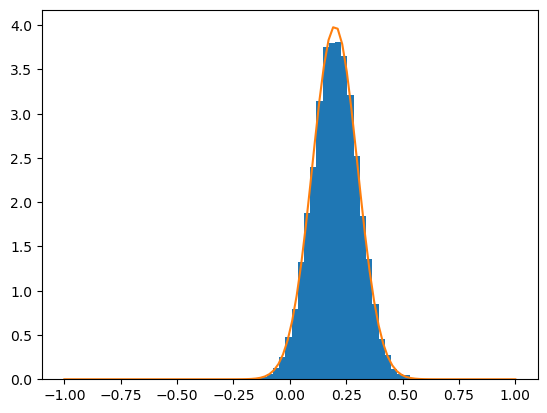

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/rogve98/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe30b7060d0>

In [6]:
hist(x,density=true,bins=30)
xs = range(-1, stop = 1, length = 100)
ys = [f(x,mu,sigma) for x in xs]
plot(xs,ys)

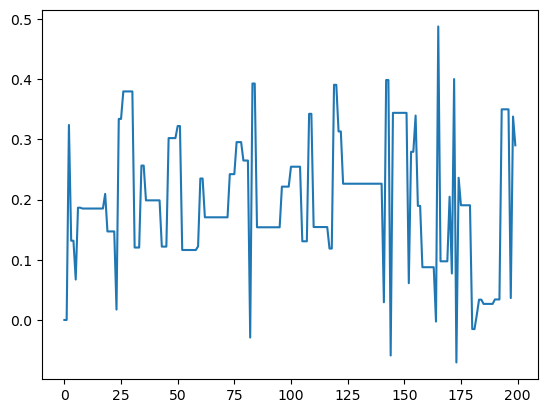

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe3381e4af0>

In [7]:
plot(x[1:200])